<a href="https://colab.research.google.com/github/YuanChih105316/Stock-Prediction/blob/main/LSTM_Regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy
from sklearn.model_selection import train_test_split
class data_process:
  def __init__(self):
    pass
    
  # Make the split data and slice sequences at the same time
  def split_sequences(self, data, slice_size, sequences):
    train, val = train_test_split(data, train_size = slice_size, shuffle = False)

    X_train, y_train = self.create_sequences(train, sequences)
    X_val, y_val = self.create_sequences(val, sequences)
    return X_train, y_train, X_val, y_val 

  # Slice sequences with a independent function
  def create_sequences(self, data, sequences):
    X = []
    y = []
    for i in range(sequences, len(data)):
        X.append(data.iloc[i-sequences:i, :])
        y.append(data.iloc[i, :])
    X = numpy.array(X)
    y = numpy.array(y)
    return X, y

In [122]:
import matplotlib.pyplot as plt

class Model_patten:
  def __init__(self, X_train, y_train, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val
        self.model = Sequential()
        self.model.add(LSTM(units=64, dropout=0.2, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        # self.model.add(LSTM(units=64, dropout=0.1, return_sequences=True))
        # self.model.add(LSTM(units=64, dropout=0.2, return_sequences=True))
        self.model.add(LSTM(units=32, dropout=0.2, return_sequences=False))
        self.model.add(Dense(units=X_train.shape[2]))
        self.model.compile(optimizer='Adam', loss='mse')
        # callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        self.history = self.model.fit(X_train, y_train, validation_data=(self.X_val, self.y_val), epochs=5, batch_size=32)#, callbacks=[callback])

  def get_loss(self):
    plt.plot(self.history.history['loss'])
    plt.plot(self.history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

  def predict(self, X_test):
    return self.model.predict(X_test)

In [123]:
import matplotlib.pyplot as plt

# For compare the predict values with Actual values we make a graph that
# xlabel : Time line
# ylabel : Pct_change (Cause our feature has 22 columns so here make a ylimit that watching much more easier)
# For the red line is Actual Feature and the blue line is Predicted Feature 

class PlotGraph:
    def __init__(self):
        pass
    
    def predict_graph(self, result, actual, timestep, name):
        plt.figure(figsize=(12, 8))
        plt.title(f'Actual vs. Predicted {name} Prices(Timestep {timestep})')
        plt.xlabel('Timestamp')
        plt.ylabel(f'{name}')
        plt.plot(result, label=f'Predicted {name}', color='b', linestyle='--')
        plt.plot(actual['Close'], label=f'Actual {name}', color='r')
        xtick_labels = [d.strftime('%b %d') for d in actual['Date']]
        xtick_locs = np.arange(len(result))
        plt.xticks(xtick_locs, xtick_labels, rotation=45)
        plt.legend()
        plt.show()

In [124]:
class read_process:
  def __init__(self):
    pass
  def read_process(self, data):
    Time = pd.to_datetime(data['Date'])
    data = data.drop(['Date'], axis=1)
    data = data.apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce')).fillna(-1).astype('float32')
    data = pd.concat([Time, data], axis=1)
    return data    

In [125]:
# import side
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from google.colab import drive
import warnings
import datetime as dt

warnings.filterwarnings('ignore')

In [126]:
# Reading data and turn into dataframe 
drive.mount('/content/gdrive')
raw_data = pd.read_csv("/content/gdrive/MyDrive/GSPC.csv")

rp = read_process()
raw_data = rp.read_process(raw_data)

all = len(raw_data)
predict = 20
sequences = 5
trainlen = 210
split_size = 0.8
train_data = raw_data[all - predict - trainlen:all - predict]

test_data_30 =  raw_data[all - predict - sequences:]

Actual_feature = raw_data.tail(predict).reset_index()
train_data.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(210, 7)

In [127]:
sc = MinMaxScaler(feature_range=(0, 1))
train_scaled = sc.fit_transform(train_data.iloc[:, 4:5])
train_scaled = pd.DataFrame(train_scaled)

In [128]:
# After transform the feature to OneHotEncoder we are going to make the train, validation split and slice the Timestep to sequences
dp = data_process()
X_train_30, y_train_30, X_val_30, y_val_30 = dp.split_sequences(train_scaled,split_size, sequences)
X_train_30.shape, y_train_30.shape,X_val_30.shape,y_val_30.shape

((163, 5, 1), (163, 1), (37, 5, 1), (37, 1))

Epoch 1/5
6/6 [==============================] - 5s 148ms/step - loss: 0.2422 - val_loss: 0.2657
Epoch 2/5
6/6 [==============================] - 0s 14ms/step - loss: 0.1362 - val_loss: 0.1203
Epoch 3/5
6/6 [==============================] - 0s 10ms/step - loss: 0.0619 - val_loss: 0.0180
Epoch 4/5
6/6 [==============================] - 0s 10ms/step - loss: 0.0274 - val_loss: 0.0127
Epoch 5/5
6/6 [==============================] - 0s 10ms/step - loss: 0.0401 - val_loss: 0.0081


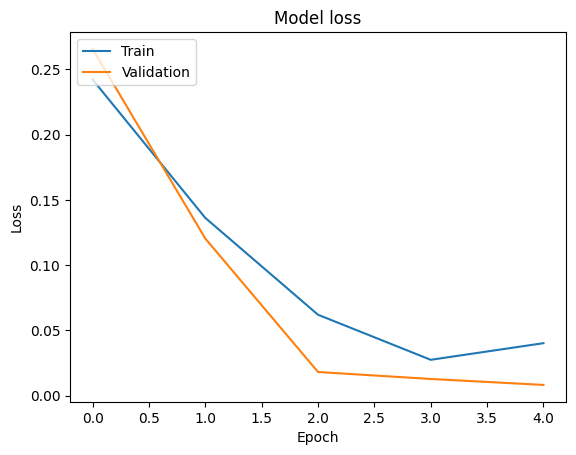

In [129]:
model_30 = Model_patten(X_train_30, y_train_30, X_val_30, y_val_30)
model_30.get_loss()

In [130]:
test_scaled = sc.transform(test_data_30.iloc[:, 4:5])
test_scaled = pd.DataFrame(test_scaled)
# Then we slice the range Timestep to sequences
X_test_30, y_test_30 = dp.create_sequences(test_scaled, sequences)

# Now we are going to predict the value in our model
test_pred_30 = model_30.predict(X_test_30)

# After the predicted values here we decode the OneHotEncoder that the same transform we use
pred = sc.inverse_transform(test_pred_30)

1/1 [==============================] - 1s 639ms/step


In [131]:
print(pred)

[[3962.992 ]
 [3943.653 ]
 [3942.1663]
 [3952.8293]
 [3967.385 ]
 [3974.3425]
 [3986.5623]
 [3985.4692]
 [3993.9153]
 [3996.686 ]
 [3989.8088]
 [3999.4497]
 [4011.3145]
 [4025.6296]
 [4044.9133]
 [4068.704 ]
 [4082.4897]
 [4092.615 ]
 [4091.633 ]
 [4087.8342]]


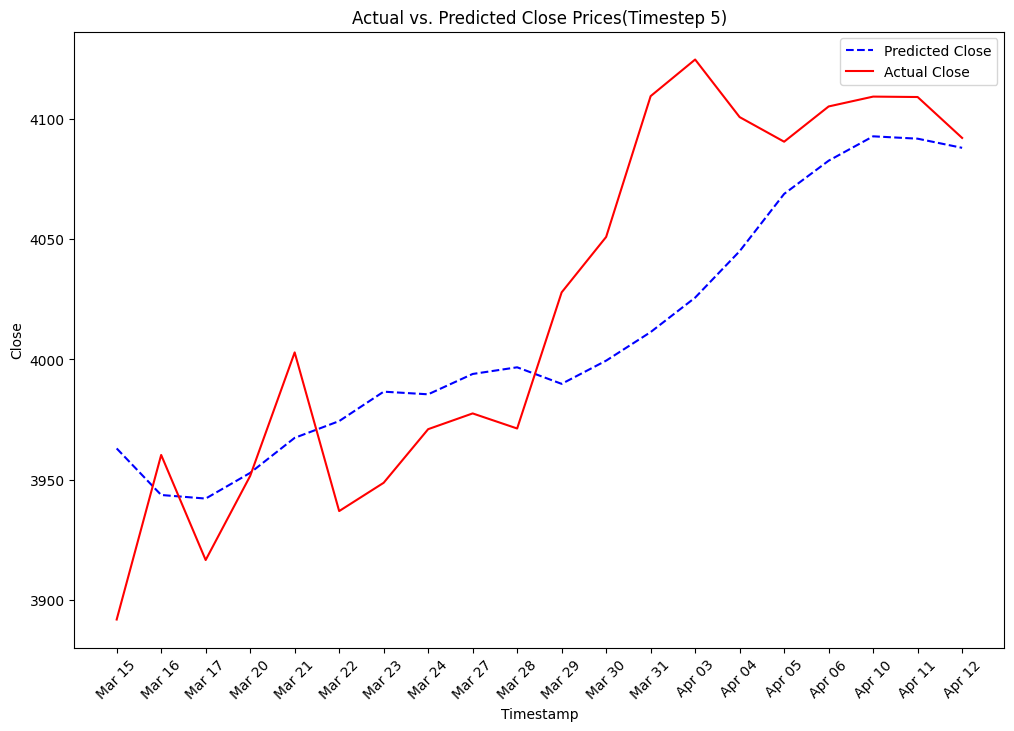

In [132]:
# Last make a graph to look the predict in our model and compare the actual happened
pg = PlotGraph()
pg.predict_graph(pred, Actual_feature, sequences, 'Close')